### Transportation Data Analysis - Road Accident for 10 countries from year 2000-2024

In [2]:
# 1. Importing required libraries
import pandas as pd
import numpy as np
%load_ext sql
import pyodbc
import  matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
# 2. Loading the SQL query in Python and converting dataset into a DataFrame
conn = pyodbc.connect(r"DRIVER={ODBC Driver 17 for SQL Server};" r"SERVER=COMP\SQLEXPRESS;" r"DATABASE=PortfolioProjects;" r"Trusted_Connection=yes;")
cursor = conn.cursor().execute("with cte1 (country,year,total_accidents) as(select country, year, count(year)as total_accidents from PortfolioProjects..road_accident_dataset group by country,year) SELECT * FROM (SELECT country,year,total_accidents FROM cte1) AS source_table PIVOT (SUM(total_accidents) FOR country IN ([Germany], [Canada],[USA],[Japan],[India],[UK],[Russia],[China],[Australia],[Brazil])) AS pivot_table order by year desc")
query1 = cursor.fetchall()
conn.close()
yearlyTrend1 = pd.DataFrame.from_records(query1, columns = ['year','Germany', 'Canada','USA','Japan','India','UK','Russia','China','Australia','Brazil'])
yearlyTrend1['year']=yearlyTrend1['year'].astype(int)


Select country of which you want the accident trend chart between 2000-2024 : USA, Brazil, Germany, Australia, China, India, Russia, UK, Canada, Japan :
 Canada


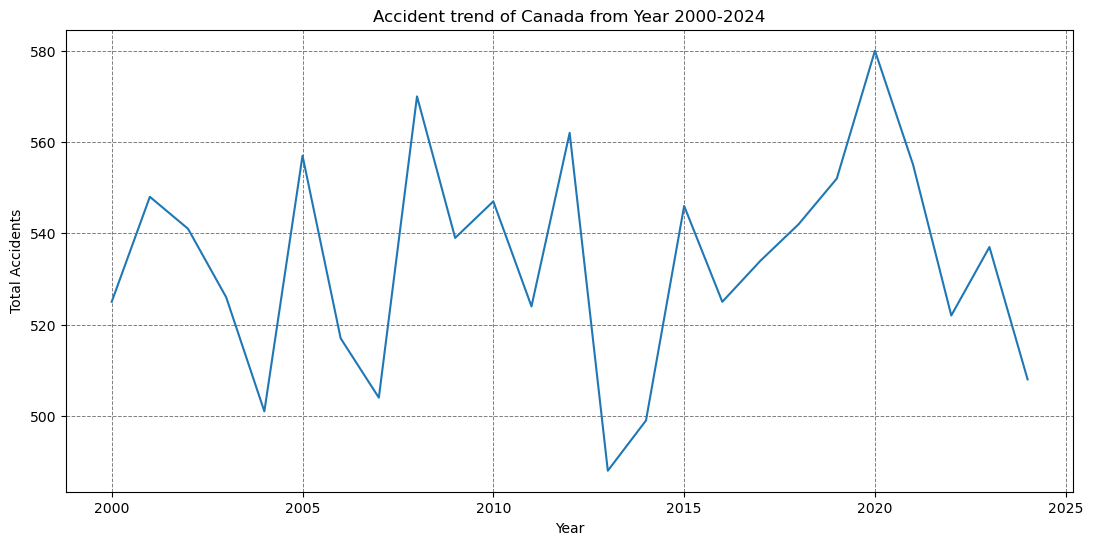

In [31]:
# 3. Accident Frequency visualization by user-desired country from year 2000-2024
try:
    x = input('\nSelect country of which you want the accident trend chart between 2000-2024 : USA, Brazil, Germany, Australia, China, India, Russia, UK, Canada, Japan :\n')
    plt.figure(figsize=(13,6)) 
    plt.plot(yearlyTrend1['year'],yearlyTrend1[x])
    plt.grid(True, axis='both', linestyle='--', color='gray', linewidth=0.7)
    plt.xlabel('Year')
    plt.ylabel('Total Accidents')
    plt.title('Accident trend of {} from Year 2000-2024'.format(x) )
    plt.show()
except :
    print('Error! Kindly type valid country name from the list!')


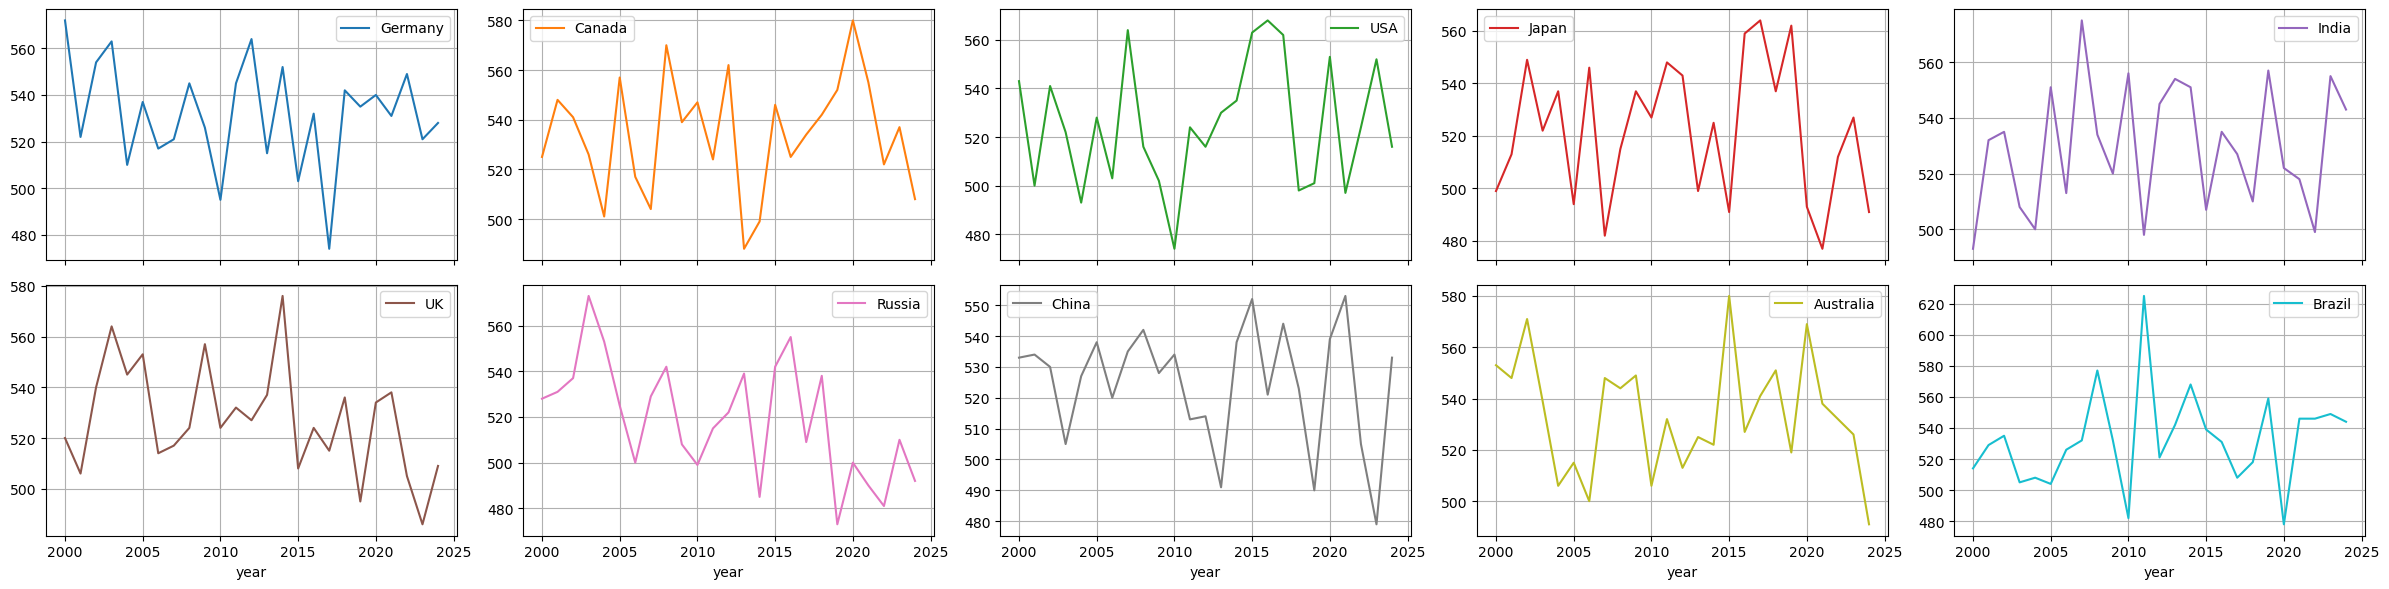

In [107]:
# 3.Accident Frequency visualization for 10 countries and their yearly trend of accidents
axes = yearlyTrend1.plot(x='year', y=['Germany', 'Canada','USA','Japan','India','UK','Russia','China','Australia','Brazil'], subplots=True, layout=(2, 5), figsize=(24, 6))
for row in axes:
    for ax in row:
        ax.grid(True)
    
plt.tight_layout()  
plt.show()

In [17]:
# Loading the SQL query in Python and converting dataset into a DataFrame
conn = pyodbc.connect(r"DRIVER={ODBC Driver 17 for SQL Server};" r"SERVER=PARIKSHITA-COMP\SQLEXPRESS;" r"DATABASE=PortfolioProjects;" r"Trusted_Connection=yes;")
cursor = conn.cursor().execute("SELECT [Day of Week], count([Day of Week]) AS accidents_bydays FROM PortfolioProjects..road_accident_dataset GROUP BY ([Day of Week])")
query2 = cursor.fetchall()
conn.close()
DayvsAccidents_df = pd.DataFrame.from_records(query2,columns = ['Day_of_Week','Accidents'])
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
DayvsAccidents_df['Day_of_Week'] = pd.Categorical(DayvsAccidents_df['Day_of_Week'],categories=day_order,ordered=True)
DayvsAccidents = DayvsAccidents_df.sort_values(by='Day_of_Week')


In [18]:
# Loading the SQL query in Python and converting dataset into a DataFrame
conn = pyodbc.connect(r"DRIVER={ODBC Driver 17 for SQL Server};" r"SERVER=COMP\SQLEXPRESS;" r"DATABASE=PortfolioProjects;" r"Trusted_Connection=yes;")
cursor = conn.cursor().execute("SELECT [Month], count([Month]) AS total_accident_asper_month FROM PortfolioProjects..road_accident_dataset GROUP BY [Month]")
query3 = cursor.fetchall()
conn.close()
MonthvsAccidents_df = pd.DataFrame.from_records(query3,columns = ['Month','Accidents'])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
MonthvsAccidents_df['Month'] = pd.Categorical(MonthvsAccidents_df['Month'], categories=month_order, ordered=True)
MonthvsAccidents = MonthvsAccidents_df.sort_values(by='Month')

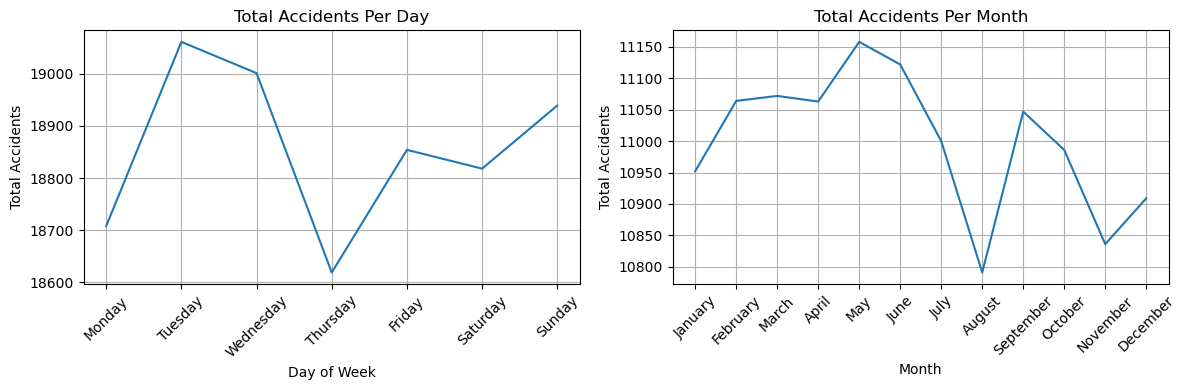

In [22]:
# Accident Frequency visualization by Day and Month
fig,axs = plt.subplots(1,2,figsize=(12,4))

axs[0].plot(DayvsAccidents['Day_of_Week'], DayvsAccidents['Accidents'])
axs[0].set_title('Total Accidents Per Day')
axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Total Accidents')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

#axs[0].legend()
axs[1].plot(MonthvsAccidents['Month'], MonthvsAccidents['Accidents'])
axs[1].set_title('Total Accidents Per Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Accidents')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()


Select the year (2000-2024) of which you want the accident trend chart of all countries :
 2007


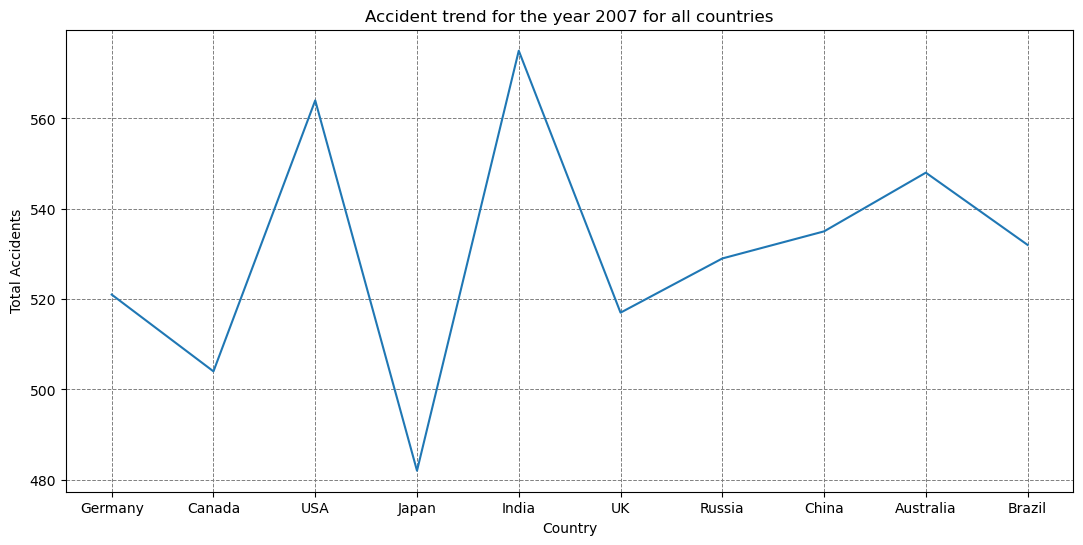

In [54]:
# Accident Frequency visualization by user-desired year for all countries
yearlyTrend2 = yearlyTrend1.copy() 
yearlyTrend2 = yearlyTrend2.set_index('year')

try:
    y = input('\nSelect the year (2000-2024) of which you want the accident trend chart of all countries :\n')
    plt.figure(figsize=(13,6)) 
    plt.plot(yearlyTrend2.T.index,yearlyTrend2.T[int(y)])
    plt.grid(True, axis='both', linestyle='--', color='gray', linewidth=0.7)
    plt.xlabel('Country')
    plt.ylabel('Total Accidents')
    plt.title('Accident trend for the year {} for all countries'.format(y) )
    plt.show()
except :
    print('Error! Kindly type valid year from range(2000-2024)!')

In [26]:
# Loading data for clustering
conn = pyodbc.connect(r"DRIVER={ODBC Driver 17 for SQL Server};" r"SERVER=COMP\SQLEXPRESS;" r"DATABASE=PortfolioProjects;" r"Trusted_Connection=yes;")
cursor = conn.cursor().execute("select [Weather Conditions],[Time of Day],[Day of Week] from PortfolioProjects..road_accident_dataset")
query4 = cursor.fetchall()
conn.close()
road_accident_df = pd.DataFrame.from_records(query4,columns = ['Weather','Time of Day','Day of Week']) 

In [53]:
road_accident_df

,Weather,Time of Day,Day of Week,Cluster
0,3,1,3,0
1,1,1,5,5
2,0,2,0,4
3,2,3,4,1
4,0,2,6,1
...,...,...,...,...
131995,3,0,4,2
131996,3,1,6,2
131997,4,3,4,2
131998,4,3,6,2


In [51]:
# Encoding categorical features into numerical values
# clear = 0, Rain = 1, Fog = 2, Snow = 3, Wind = 4
le_weather = LabelEncoder()
road_accident_df['Weather'] = le_weather.fit_transform(road_accident_df['Weather'])

# Morning = 0, Afternoon = 1, Evening = 2, Night = 3
le_time = LabelEncoder()
road_accident_df['Time of Day'] = le_time.fit_transform(road_accident_df['Time of Day'])

#Monday = 0, Tuesday = 1, Wednesday = 2, Thursday = 3, Friday = 4, Saturday = 5, Sunday = 6
le_day = LabelEncoder()
road_accident_df['Day of Week'] = le_day.fit_transform(road_accident_df['Day of Week'])

# Features for clustering
X = road_accident_df[['Weather', 'Time of Day', 'Day of Week']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
road_accident_df['Cluster'] = kmeans.fit_predict(X)

# Show cluster centers 
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[3.41591406 1.23812819 1.27618354]
 [0.99504901 2.57796559 4.72129426]
 [3.50369612 1.64740892 4.71465939]
 [0.88264507 0.74895978 2.00425037]
 [1.15684188 2.34789317 0.70142584]
 [0.99412387 0.49441768 5.00340816]]


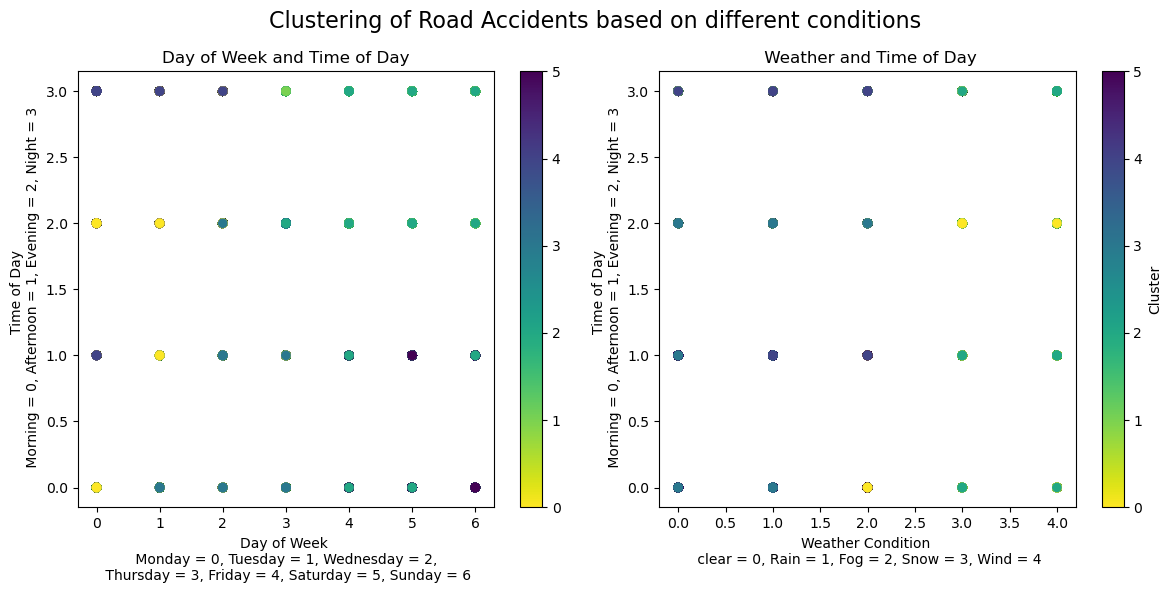

In [52]:
# Visualizing the clusters
fig, axs = plt.subplots(1,2,figsize=(12,6))

scatter0 = axs[0].scatter(road_accident_df['Day of Week'], road_accident_df['Time of Day'], c=road_accident_df['Cluster'], cmap='viridis_r')
axs[0].set_xlabel('Day of Week \n Monday = 0, Tuesday = 1, Wednesday = 2, \n Thursday = 3, Friday = 4, Saturday = 5, Sunday = 6')
axs[0].set_ylabel('Time of Day \n Morning = 0, Afternoon = 1, Evening = 2, Night = 3')
axs[0].set_title('Day of Week and Time of Day')
fig.colorbar(scatter0)


scatter1 = axs[1].scatter(road_accident_df['Weather'], road_accident_df['Time of Day'], c=road_accident_df['Cluster'], cmap='viridis_r')
axs[1].set_xlabel('Weather Condition \n clear = 0, Rain = 1, Fog = 2, Snow = 3, Wind = 4')
axs[1].set_ylabel('Time of Day \n Morning = 0, Afternoon = 1, Evening = 2, Night = 3')
axs[1].set_title(' Weather and Time of Day')
fig.colorbar(scatter1, label='Cluster')

plt.subplots_adjust(hspace=1.0) 
fig.suptitle('Clustering of Road Accidents based on different conditions',fontsize=16)
plt.tight_layout()  
plt.show()

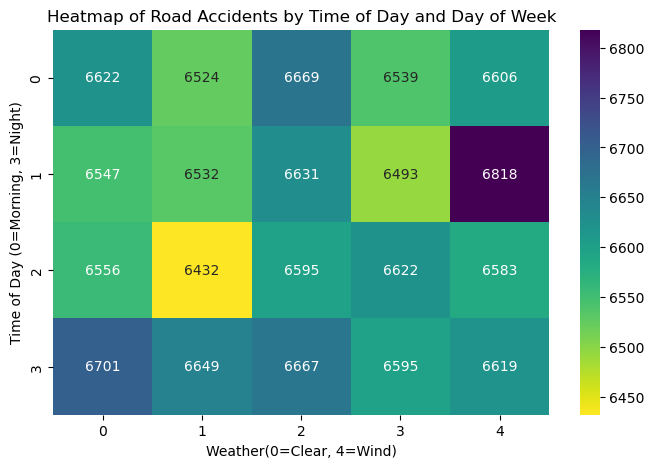

In [58]:
# Create a heatmap of occurrences
heatmap_data = road_accident_df.pivot_table(index='Time of Day', columns='Weather', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap="viridis_r", annot=True, fmt="d")
plt.title("Heatmap of Road Accidents by Time of Day and Day of Week")
plt.xlabel("Weather(0=Clear, 4=Wind)")
plt.ylabel("Time of Day (0=Morning, 3=Night)")
plt.show()

In [1]:
print("\nKey Findings:")
print("- Accident Frequency visualization by user-desired country from year 2000-2024")
print("- Accident Frequency visualization for 10 countries and their yearly trend of accidents")
print("- Accident Frequency visualization by user-desired year for all countries")
print("- Clustering to visualize road accidents based on different variables : Although, it was a categorical data, \n therefore not much scatters to see ")
print("- Heatmap - Accidents based on time data")



Key Findings:
- Accident Frequency visualization by user-desired country from year 2000-2024
- Accident Frequency visualization for 10 countries and their yearly trend of accidents
- Accident Frequency visualization by user-desired year for all countries
- Clustering to visualize road accidents based on different variables : Although, it was a categorical data, 
 therefore not much scatters to see 
- Heatmap - Accidents based on time data
